In [56]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [6,2]

##### pandas와 matplotlib을 의용한 시각확
###### 1. line

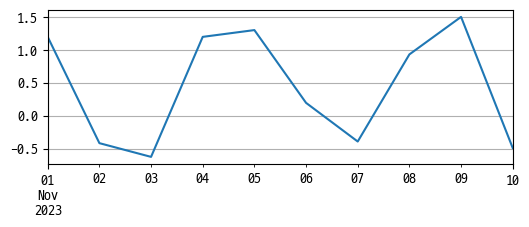

In [11]:
# 1. Series
s1 = pd.Series(np.random.randn(10), index=pd.date_range('2023-11-01', periods=10, freq='D'))
s1.plot(grid=True, kind='line')
plt.show()

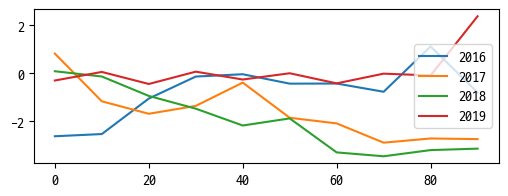

In [22]:
# 2. DataFrame
df = pd.DataFrame(np.random.randn(10,4).cumsum(axis=0)
                 , columns = ['2016', '2017', '2018', '2019']
                 , index=np.arange(0,100,10))
df.plot()
plt.show()

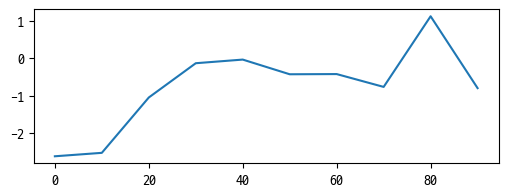

In [26]:
df['2016'].plot()
plt.show()

In [28]:
# 강수량비교시각화
# 1) 데이터로딩
df_rain = pd.read_csv('../data/sea_rain.csv', index_col='연도', encoding='utf-8')
df_rain

,동해,남해,서해,전체
연도,,,,
1996,17.4629,17.2288,14.4360,15.9067
1997,17.4116,17.4092,14.8248,16.1526
1998,17.5944,18.0110,15.2512,16.6044
1999,18.1495,18.3175,14.8979,16.6284
2000,17.9288,18.1766,15.0504,16.6178


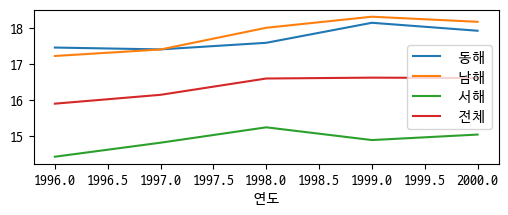

In [29]:
# 2) 시각화
df_rain.plot()
plt.show()

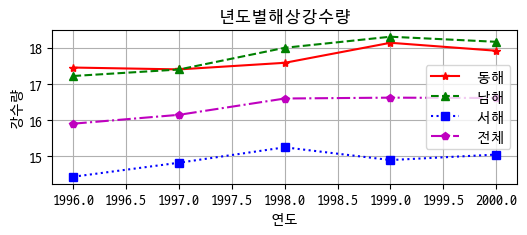

In [49]:
rain_plot = df_rain.plot(grid=True, style=['r-*','g--^','b:s','m-.p'])
rain_plot.set_xlabel('연도')
rain_plot.set_ylabel('강수량')
rain_plot.set_title('년도별해상강수량')
plt.show()

###### 2. bar

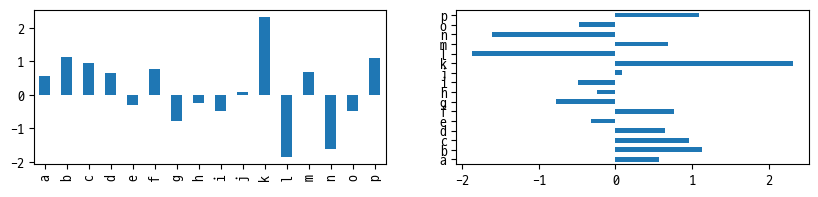

In [58]:
# 1. Series
plt.rcParams['figure.figsize'] = [10,2]

s1 = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
plt.subplot(121)
s1.plot(kind='bar')
plt.subplot(122)
s1.plot(kind='barh')
plt.show()

In [59]:
# 2. DataFrame
df = pd.DataFrame(np.random.randn(6,4), index=['1월','2월','3월','4월','5월','6월',]
                 ,columns=pd.Index(['2015','2016','2017','2018']))
df

,2015,2016,2017,2018
1월,0.064280,-1.077745,-0.715304,0.679598
2월,-0.730367,0.216459,0.045572,-0.651600
3월,2.143944,0.633919,-2.025143,0.186454
4월,-0.661786,0.852433,-0.792521,-0.114736
5월,0.504987,0.865755,-1.200296,-0.334501
6월,-0.474945,-0.653329,1.765454,0.404982


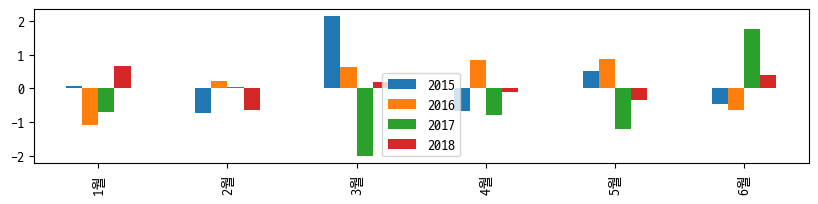

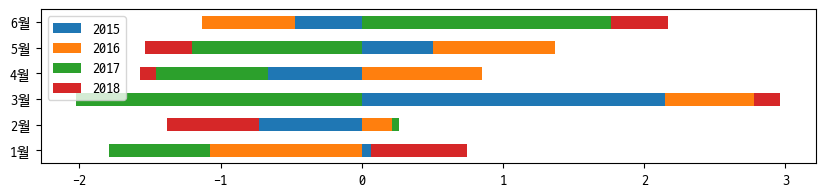

In [62]:
df.plot(kind='bar')
df.plot(kind='barh', stacked=True)
plt.show()

###### 3. histogram

* pattern : 좌우대칭, 왼쪽치우침, 오른쪽치우침, 단봉형, 쌍봉형

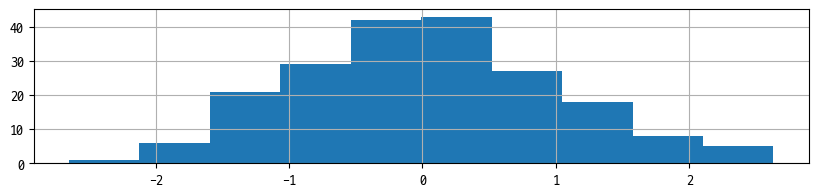

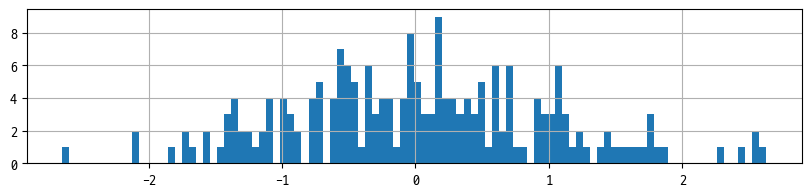

In [65]:
# 1. Series
s1 = pd.Series(np.random.normal(0,1,size=200))
s1.hist() # 구간의 기본값 : bins=10
plt.show()

s1.hist(bins=100) # 구간의 기본값 : bins=10
plt.show()

In [66]:
## 2. DataFrame 학생별 학생수 비교(시각화) - hist()
math = [76,82,84,83,90,86,85,92,72,71,100,87,81,76,94,78,81,60,79,69,74,87,82,68,79]
print(f'수학점수 갯수 = {len(math)}, 수학점수의 최소값 = {min(math)}, 수학점수의 최대값 = {max(math)}')

수학점수 갯수 = 25, 수학점수의 최소값 = 60, 수학점수의 최대값 = 100


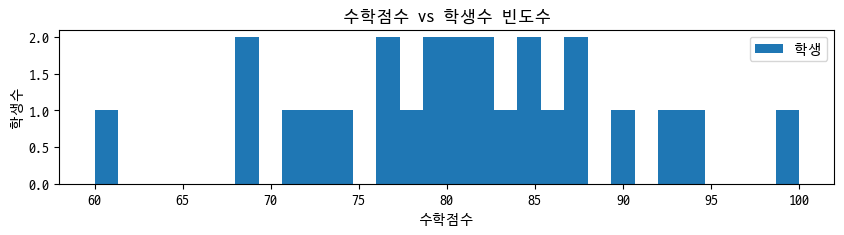

In [75]:
# 시각화(histogram)
df_math = pd.DataFrame(math, columns=['학생'])

math_hist = df_math.plot(kind='hist', bins=30)
math_hist.set_xlabel('수학점수')
math_hist.set_ylabel('학생수')
math_hist.set_title('수학점수 vs 학생수 빈도수')
plt.show()

###### 4. scatter

In [86]:
x1 = np.random.normal(1,1,size=(100,1))
x2 = np.random.normal(-2,4,size=(100,1))

# np.concatnate()
X = np.concatenate([x1,x2], axis=1)  # 열방향(세로)
X1 = np.concatenate([x1,x2], axis=0) # 행방향(가로)
print(X.shape, X1.shape)

(100, 2) (200, 1)


In [87]:
df = pd.DataFrame(X, columns=['X', 'y'])
df.head()

,X,y
0,-0.662492,-1.641677
1,2.032546,-2.789354
2,2.126705,-2.605093
3,-0.090966,-2.779633
4,0.589186,2.535080


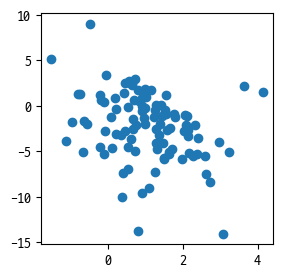

In [89]:
# 산점도 - 데이터의 상관관계를 시각화
# 양의 상관관계 - 독립변수가 증가할 때 종속변수도 증가
# 음의 상관관계 - 독립변수가 증가할 때 종속변수도 감수
plt.figure(figsize=(3,3))
plt.scatter(df.X, df.y)
plt.show()

# 결과분석
# X와 y는 상관관계가 없다. 즉, 통계적으로 X, y는 무의(미)하다.

In [90]:
# 실습. 온도별 아이스크림 판매량의 시각화(상관관계)하기
# df.plot.scatter()
temperature = [25.2, 27.4,22.9,26.2,29.5,33.1,30.4,36.1,34.4,29.1] # 독립변수
Ice_cream_sales = [236500, 357500,203500,365200,446600,574200,453200,675400,598400,463100] # 종속변수

In [92]:
dict_data = {'온도':temperature, '판매량':Ice_cream_sales}
df_ice_cream = pd.DataFrame(dict_data, columns=['온도', '판매량'])
df_ice_cream.head(2)

,온도,판매량
0,25.2,236500
1,27.4,357500


<Figure size 300x300 with 0 Axes>

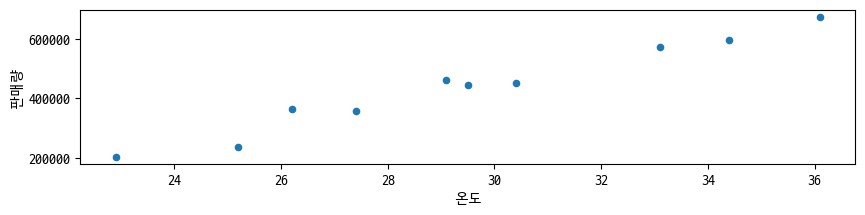

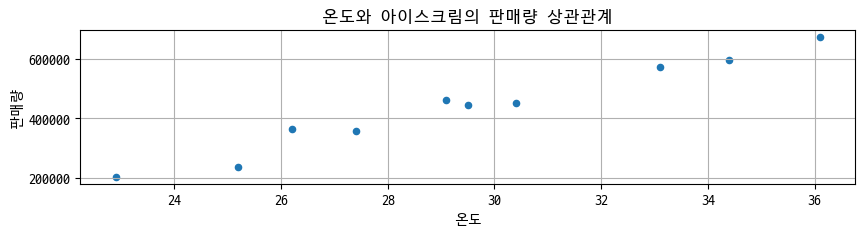

In [102]:
plt.figure(figsize=(3,3))
df_ice_cream.plot(x='온도', y='판매량', kind='scatter')
plt.show()

df_ice_cream.plot.scatter(x='온도', y='판매량', grid=True, title='온도와 아이스크림의 판매량 상관관계')
plt.show()

# 결과분석
# 온도와 아이스크림의 판매량은 양의 상관관계가 있다.

###### 5. pie

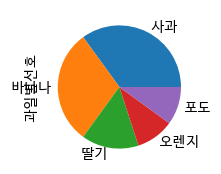

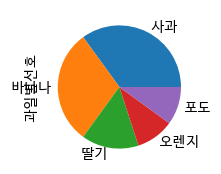

In [104]:
fruit = ['사과','바나나','딸기','오렌지','포도']
sales = [7,6,3,2,2]

df_fruit = pd.Series(sales, index=fruit, name="과일별선호")
df_fruit.plot(kind='pie')
plt.show()

df_fruit.plot.pie()
plt.show()

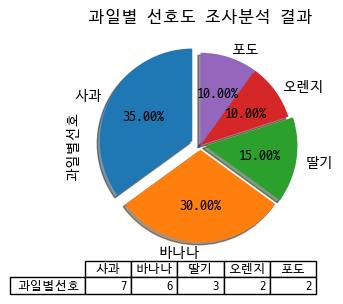

In [121]:
explode_value = (0.1, 0.05, 0.05, 0, 0)
df_fruit.plot.pie(figsize=(3,3), explode=explode_value, autopct='%.2f%%'
                 , counterclock=True, shadow=True, startangle=90, table=True
                 , title='과일별 선호도 조사분석 결과')

plt.savefig('../data/과일선호도분석결과.png')
plt.show()

###### 6. Box

* 수치적 통계치를 시각화

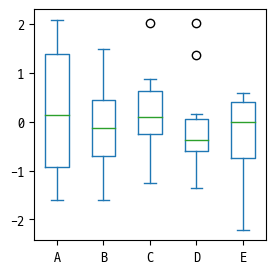

In [124]:
df = pd.DataFrame(np.random.randn(10,5), columns=list('ABCDE'))
df.plot.box(figsize=(3,3))
plt.show()

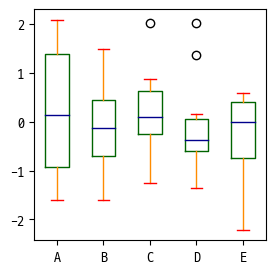

In [131]:
# box plot 꾸미기
colors = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')
df.plot.box(figsize=(3,3), color=colors)
plt.show()

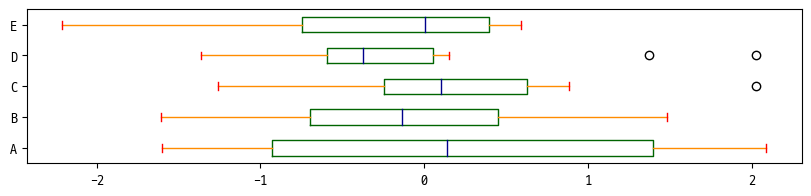

In [133]:
df.plot.box(color=colors, vert=False)

plt.show()

###### 7. Area

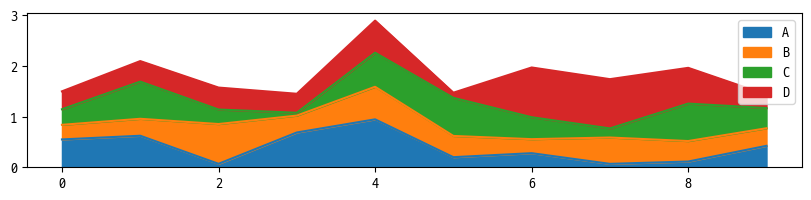

In [139]:
# Area그래프는 음수값이 있으면 에러 즉, 영역에는 음수값이 존재하지 않는다.
df = pd.DataFrame(np.random.rand(10,4), columns=list('ABCD'))
df.plot.area()
plt.show()

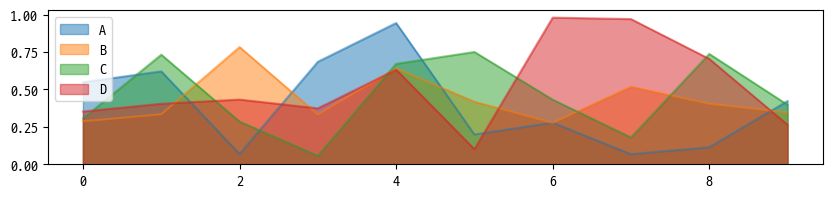

In [140]:
df.plot.area(stacked=False)
plt.show()